In [1]:
# Import the necessary packages
import os

# For calculating
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#for modeling
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
X_train = pd.read_csv("../data/X_train.csv")
y_train = pd.read_csv("../data/y_train.csv")
X_test = pd.read_csv("../data/X_test.csv")
y_test = pd.read_csv("../data/y_test.csv")

In [3]:
X_train.head()

,one_hot__airline_5K,one_hot__airline_5M,one_hot__airline_6P,one_hot__airline_BJ,one_hot__airline_D4,one_hot__airline_GJ,one_hot__airline_GW,one_hot__airline_OL,one_hot__airline_PS,one_hot__airline_QS,...,one_hot__iso_country_arr_TR,one_hot__iso_country_arr_UA,one_hot__type_dep_large_airport,one_hot__type_dep_medium_airport,one_hot__type_dep_small_airport,one_hot__type_arr_large_airport,one_hot__type_arr_medium_airport,one_hot__type_arr_small_airport,passthrough__is_same_country,passthrough__std_time_dec
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,False,11.4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,False,18.2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,False,13.8
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,False,9.3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,False,10.0


In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74943 entries, 0 to 74942
Columns: 159 entries, one_hot__airline_5K to passthrough__std_time_dec
dtypes: bool(1), float64(158)
memory usage: 90.4 MB


### CatBoost with default parameters

In [5]:
# Initialize the CatBoostRegressor with indices
model = CatBoostRegressor(learning_rate=0.1, l2_leaf_reg=1, iterations=500, depth=10, verbose=0)

# Fit the model
model.fit(X_train, y_train)

In [7]:
# for y_test withoug dummies

# cat_features_indices = [X_train.columns.get_loc(col) for col in [
#     'airline', 'std_day', 'sta_day', 'std_month', 'sta_month',
#     'iso_country_dep', 'type_dep',
#     'iso_country_arr', 'type_arr', 'is_same_country',
# ]]

# # Initialize the CatBoostRegressor with indices
# model = CatBoostRegressor(cat_features=cat_features_indices)

# # Fit the model
# model.fit(X_train, y_train)

In [6]:
# Get feature importance
feature_importance = model.get_feature_importance()

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_df.head(20))

                              Feature  Importance
158         passthrough__std_time_dec   25.737366
151   one_hot__type_dep_large_airport    6.355530
152  one_hot__type_dep_medium_airport    4.325024
99        one_hot__iso_country_dep_TN    3.526374
157      passthrough__is_same_country    3.354874
154   one_hot__type_arr_large_airport    3.277315
155  one_hot__type_arr_medium_airport    2.841877
148       one_hot__iso_country_arr_TN    2.820458
68        one_hot__iso_country_dep_FR    2.505823
29          one_hot__std_month_August    2.166062
45            one_hot__sta_month_July    1.547767
118       one_hot__iso_country_arr_FR    1.460674
41          one_hot__sta_month_August    1.420012
93        one_hot__iso_country_dep_SA    1.402437
19           one_hot__std_day_Tuesday    1.247366
24            one_hot__sta_day_Sunday    1.208617
10                one_hot__airline_TU    1.200323
81        one_hot__iso_country_dep_MA    1.142009
51       one_hot__sta_month_September    1.028341


In [7]:
# Make predictions
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [8]:
# Evaluate the model on training set
mse = mean_squared_error(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2: {r2}')

Mean Squared Error: 2.3278157273786992
Mean Absolute Error: 1.2137403879890603
R^2: 0.3281388964589671


In [9]:
# Evaluate the model on test set
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2: {r2}')

Mean Squared Error: 2.619486673260666
Mean Absolute Error: 1.2821638469170626
R^2: 0.24413061801431002


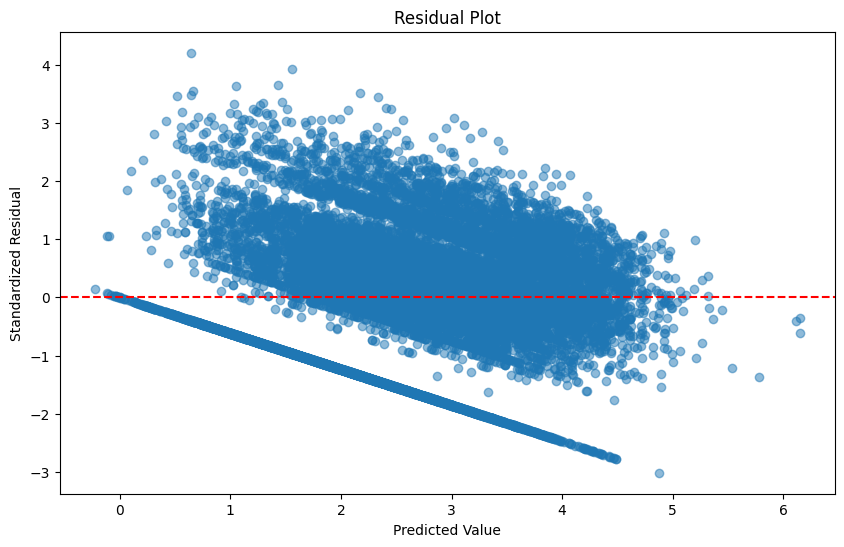

In [10]:
# Calculate residuals
residuals = y_test.values.flatten() - y_pred_test

# Standardize residuals
standardized_residuals = residuals / np.std(residuals)

# Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, standardized_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Value')
plt.ylabel('Standardized Residual')
plt.title('Residual Plot')
plt.show()

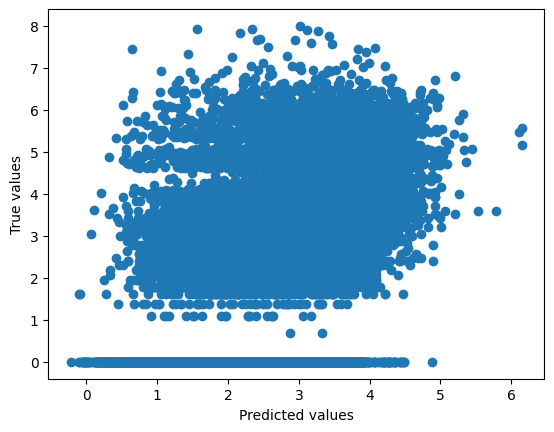

In [11]:
plt.scatter(y_pred_test, y_test) 
plt.ylabel("True values")
plt.xlabel("Predicted values")
plt.show()

### hurdle method?

### CatBoost with Grid Search

In [14]:
# # Define the parameter grid for RandomizedSearchCV
# param_grid = {
#     'iterations': [100, 200, 300, 400, 500],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
#     'depth': [4, 6, 8, 10],
#     'l2_leaf_reg': [1, 3, 5, 7, 9]
# }

# # Initialize the CatBoostRegressor
# model_rand = CatBoostRegressor(random_seed=42)

# # Create a scorer for Mean Squared Error
# mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# # Initialize RandomizedSearchCV with MSE scorer
# random_search = RandomizedSearchCV(
#     estimator=model_rand,
#     param_distributions=param_grid,  # Note: Use param_distributions here
#     n_iter=50,  # Number of random parameter combinations to try
#     scoring=mse_scorer,
#     cv=5,  # 5-fold cross-validation
#     verbose=1,
#     return_train_score=True  # To get training scores
# )

In [15]:
# # Fit RandomizedSearchCV
# random_search.fit(X_train, y_train)

In [16]:
# # Get the best parameters and best score
# best_params = random_search.best_params_
# best_score = random_search.best_score_

# # Display the results of cross-validation
# print("Best Parameters:", best_params)
# print("Best Score (Validation MSE):", best_score)

Best Parameters: {'learning_rate': 0.1, 'l2_leaf_reg': 1, 'iterations': 500, 'depth': 10}
Best Score (Validation MSE): -2.6230855530637895

In [17]:
# # Display cross-validation results
# cv_results = random_search.cv_results_

# for i in range(len(cv_results['mean_test_score'])):
#     print(f"Parameter Set {i+1}: {cv_results['params'][i]}")
#     print(f"Mean Test Score (MSE): {cv_results['mean_test_score'][i]}")
#     print(f"Mean Train Score (MSE): {cv_results['mean_train_score'][i]}")
#     print(f"Std Dev Test Score (MSE): {cv_results['std_test_score'][i]}")
#     print(f"Std Dev Train Score (MSE): {cv_results['std_train_score'][i]}\n")

In [18]:
# # Use the best model for predictions
# best_model = random_search.best_estimator_

In [19]:
# # Get feature importance
# feature_importance = best_model.get_feature_importance()

# # Create a DataFrame for better visualization
# feature_importance_df = pd.DataFrame({
#     'Feature': X_train.columns,
#     'Importance': feature_importance
# })

# # Sort the DataFrame by importance
# feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# # Display the feature importance
# print(feature_importance_df.head(20))

In [20]:
# # Make predictions
# y_pred_test = best_model.predict(X_test)
# y_pred_train = best_model.predict(X_train)

In [21]:
# # Evaluate the model on training set
# mse = mean_squared_error(y_train, y_pred_train)
# mae = mean_absolute_error(y_train, y_pred_train)
# r2 = r2_score(y_train, y_pred_train)

# print(f'Mean Squared Error: {mse}')
# print(f'Mean Absolute Error: {mae}')
# print(f'R^2: {r2}')

In [22]:
# # Evaluate the model on test set
# mse = mean_squared_error(y_test, y_pred_test)
# mae = mean_absolute_error(y_test, y_pred_test)
# r2 = r2_score(y_test, y_pred_test)

# print(f'Mean Squared Error: {mse}')
# print(f'Mean Absolute Error: {mae}')
# print(f'R^2: {r2}')

In [23]:
# # Calculate residuals
# residuals = y_test.values.flatten() - y_pred_test

# # Standardize residuals
# standardized_residuals = residuals / np.std(residuals)

# # Create a residual plot
# plt.figure(figsize=(10, 6))
# plt.scatter(y_pred_test, standardized_residuals, alpha=0.5)
# plt.axhline(y=0, color='r', linestyle='--')
# plt.xlabel('Predicted Value')
# plt.ylabel('Standardized Residual')
# plt.title('Residual Plot')
# plt.show()

In [24]:
# plt.scatter(y_pred_test, y_test) 
# plt.ylabel("True values")
# plt.xlabel("Predicted values")
# plt.show()